In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [2]:
train = pd.read_csv("train_LZdllcl.csv")

In [3]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [6]:
train.shape

(54808, 14)

In [7]:
obj = [i for i in train.columns if train[i].dtypes == "object"]
obj

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [8]:
num = [i for i in train.columns if train[i].dtypes!= "object"]
num

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [9]:
test = pd.read_csv("test_2umaH9m.csv")

In [10]:
test.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,23490.0,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
no_of_trainings,23490.0,1.254236,0.600910,1.0,1.00,1.0,1.0,9.0
age,23490.0,34.782929,7.679492,20.0,29.00,33.0,39.0,60.0
previous_year_rating,21678.0,3.339146,1.263294,1.0,3.00,3.0,4.0,5.0
length_of_service,23490.0,5.810387,4.207917,1.0,3.00,5.0,7.0,34.0
KPIs_met >80%,23490.0,0.358834,0.479668,0.0,0.00,0.0,1.0,1.0
awards_won?,23490.0,0.022776,0.149191,0.0,0.00,0.0,0.0,1.0
avg_training_score,23490.0,63.263133,13.411750,39.0,51.00,60.0,76.0,99.0


In [13]:
test.shape

(23490, 13)

In [14]:
train.columns,test.columns

(Index(['employee_id', 'department', 'region', 'education', 'gender',
        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'avg_training_score', 'is_promoted'],
       dtype='object'),
 Index(['employee_id', 'department', 'region', 'education', 'gender',
        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'avg_training_score'],
       dtype='object'))

In [15]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [16]:
train.duplicated().sum()

0

In [17]:
train["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [18]:
train['education'].value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [19]:
data = pd.concat([train, test] , ignore_index= True)

In [20]:
data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [21]:
data.tail(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN
78297,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [22]:
test.shape,train.shape

((23490, 13), (54808, 14))

In [23]:
23490+54808

78298

In [24]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [25]:
data['education'].value_counts(dropna=False)


Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [26]:
data['education'].fillna('unknown', inplace = True)
data['education'].value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
unknown              3443
Below Secondary      1179
Name: education, dtype: int64

In [27]:
data['is_promoted'].value_counts(dropna=False)

0.0    50140
NaN    23490
1.0     4668
Name: is_promoted, dtype: int64

In [28]:
data['is_promoted'].fillna(0,inplace = True)

In [29]:
data['is_promoted'].value_counts(dropna=False)

0.0    73630
1.0     4668
Name: is_promoted, dtype: int64

In [30]:
data['previous_year_rating'].value_counts(dropna=False)


3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [31]:
data['previous_year_rating'].fillna(0, inplace = True)

In [32]:
data['previous_year_rating'].value_counts(dropna=False)


3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
0.0     5936
Name: previous_year_rating, dtype: int64

In [33]:
obj

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [37]:
data["gender"].value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [45]:
data["gender"].replace({"m":0,"f":1},inplace = True)

In [46]:
data["gender"].value_counts()

0    55092
1    23206
Name: gender, dtype: int64

In [52]:
data.select_dtypes(include="object").columns

Index(['department', 'region', 'education', 'recruitment_channel'], dtype='object')

In [53]:
ecd = pd.get_dummies(data, columns=['department', 'region', 'education', 'recruitment_channel'])

In [55]:
ecd.head(5)

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,1,35,5.0,8,1,0,49,0.0,...,1,0,0,0,0,1,0,0,0,1
1,65141,0,1,30,5.0,4,0,0,60,0.0,...,0,0,0,1,0,0,0,1,0,0
2,7513,0,1,34,3.0,7,0,0,50,0.0,...,0,0,0,1,0,0,0,0,0,1
3,2542,0,2,39,1.0,10,0,0,50,0.0,...,0,0,0,1,0,0,0,1,0,0
4,48945,0,1,45,3.0,2,0,0,73,0.0,...,0,0,0,1,0,0,0,1,0,0


<AxesSubplot:xlabel='is_promoted'>

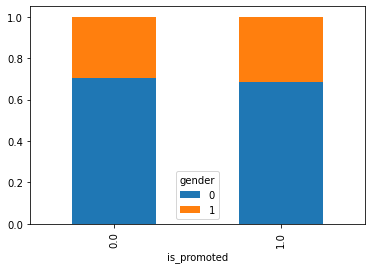

In [59]:
gender = pd.crosstab(data['is_promoted'],data['gender'])
gender.div(gender.sum(1),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:>

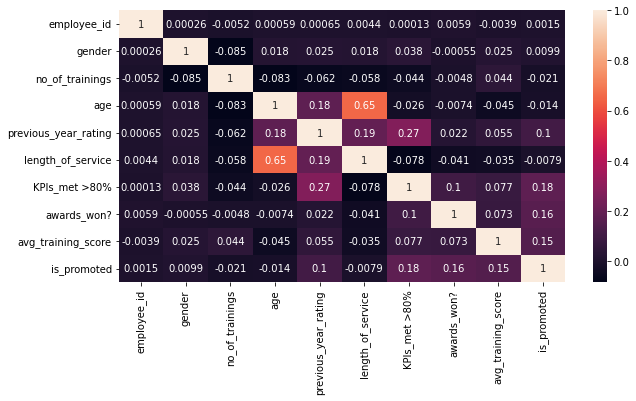

In [78]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [82]:
mmsc = MinMaxScaler()
scaled_data = mmsc.fit_transform(ecd[['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score']])
scaled_data = pd.DataFrame(scaled_data, columns=['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score'])
print(scaled_data.shape)
scaled_data.head(3)

(78298, 7)


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.375,1.0,0.194444,1.0,0.0,0.166667
1,0.0,0.250,1.0,0.083333,0.0,0.0,0.350000
2,0.0,0.350,0.6,0.166667,0.0,0.0,0.183333


In [91]:
preprocessed_data = pd.concat([scaled_data, ecd.drop(columns=['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score'])],axis=1)
preprocessed_data.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,1,0.0,...,1,0,0,0,0,1,0,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,65141,0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,7513,0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,2542,0,0.0,...,0,0,0,1,0,0,0,1,0,0
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667,48945,0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [93]:
preprocessed_data[preprocessed_data['is_promoted'].notna()]

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,1,0.0,...,1,0,0,0,0,1,0,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,65141,0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,7513,0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,2542,0,0.0,...,0,0,0,1,0,0,0,1,0,0
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667,48945,0,0.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,0.000000,0.100,0.6,0.000000,0.0,0.0,0.366667,53478,0,0.0,...,0,0,0,0,1,0,0,0,0,1
78294,0.000000,0.275,0.6,0.166667,0.0,0.0,0.583333,25600,0,0.0,...,0,0,0,1,0,0,0,0,0,1
78295,0.000000,0.150,0.8,0.083333,0.0,0.0,0.183333,45409,1,0.0,...,0,0,0,1,0,0,0,0,0,1
78296,0.222222,0.175,0.0,0.000000,0.0,0.0,0.516667,1186,0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [94]:
preprocessed_data[preprocessed_data['is_promoted'].isna()]

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing


In [95]:
preprc_train = preprocessed_data[preprocessed_data['is_promoted'].notna()]
preprc_test = preprocessed_data[preprocessed_data['is_promoted'].isna()]

In [96]:
preprc_train.to_csv('preprocessed_train_data.csv',index=False)
preprc_test.to_csv('preprocessed_test_data.csv',index=False)

In [104]:
df_train = pd.read_csv('preprocessed_train_data.csv')
df_test = pd.read_csv('preprocessed_test_data.csv')

In [105]:
df_train.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,1,0.0,...,1,0,0,0,0,1,0,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,65141,0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,7513,0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,2542,0,0.0,...,0,0,0,1,0,0,0,1,0,0
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667,48945,0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [106]:
X = df_train.drop(columns=['employee_id','is_promoted'])
y = df_train['is_promoted']

In [107]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((62638, 58), (15660, 58), (62638,), (15660,))

In [108]:
model = LogisticRegression(max_iter=500)
model.fit(train_X,train_y)

LogisticRegression(max_iter=500)

In [109]:
model.coef_, model.intercept_

(array([[-1.33613930e+00, -1.12509018e+00,  8.06866472e-01,
          7.01673065e-01,  1.42611340e+00,  1.07069810e+00,
          9.74518057e+00, -4.78350061e-02, -2.64521217e+00,
          9.99598393e-01,  2.18720466e+00,  6.26634076e-01,
          1.10468276e+00, -2.75942580e-01, -3.08915288e+00,
          2.73706286e+00, -1.61209516e+00,  2.03321508e-01,
          5.10824161e-02, -1.67219154e-01, -1.95549929e-01,
          1.74637673e-01,  1.71284628e-01,  1.32465722e-01,
          4.78711238e-02,  6.00851894e-01, -4.99342644e-01,
          8.99866870e-02,  2.59280160e-01, -1.14784657e-01,
         -2.93902156e-01,  5.27157709e-01,  5.29585460e-01,
         -3.25745355e-01,  5.86988193e-01, -5.95962032e-02,
          1.00440277e-03,  4.46144860e-01, -4.45819964e-01,
          3.37443736e-01,  3.74738856e-01, -1.02422797e-01,
         -3.07556857e-01, -4.00737049e-01, -1.10694186e+00,
          6.06996931e-01, -4.13173004e-01, -3.42600712e-01,
          4.89879902e-01, -2.66149094e-0

In [110]:
y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

Train accuracy
accuracy score 0.9444107410836872
f1 score 0.21647164716471648
confusion matrix
 [[58675   200]
 [ 3282   481]]


In [111]:
y_test_pred = model.predict(test_X)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('f1 score',f1_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Test accuracy
accuracy score 0.945530012771392
f1 score 0.1899335232668566
confusion matrix
 [[14707    48]
 [  805   100]]
